In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime
%matplotlib inline

np.random.seed(777)

# LinUCB - 1

In [2]:
class LinUCB:
    def __init__(self, N, d, alpha=1.):
        self.N = N # the cardinality of A_t (i.e. the number of arms in an action set)
        self.d = d # dimension of each arm
        self.alpha = alpha # exploration bonus
        self.A = [np.identity(d) for _ in range(N)] # gram matrix for each arm as in the algorithm
        self.b = [np.zeros(shape=(d, 1)) for _ in range(N)] # corresponds to X^Ty for each arm
        
    def choose(self, x):
        """
        x: A_t, a (N, d) shape matrix
        return: a_t, the index of the chosen arm
        """
        ucb_scores = np.zeros(self.N)
        for n in range(self.N):
            arm = x[n, :].reshape(-1, 1)
            A_a, b_a = self.A[n], self.b[n]
            A_a_inv = np.linalg.inv(A_a)
            theta_a = A_a_inv @ b_a # d-dimensional array
            
            mean = (arm.T @ theta_a).item()
            bonus = np.sqrt((arm.T @ A_a_inv @ arm).item())
            ucb_scores[n] = mean + (self.alpha * bonus)
        
        argmax = np.where(ucb_scores == np.max(ucb_scores))[0]
        return np.random.choice(argmax)
    
    def update(self, x, a, r):
        """
        x: A_t again
        a: index of a_t
        r: realized reward by pulling a_t
        """
        chosen_arm = x[a, :].reshape(-1, 1)
        A_at, b_at = self.A[a], self.b[a]
        new_b_at = b_at + (r * chosen_arm)
        new_A_at = A_at + (chosen_arm @ chosen_arm.T)
        self.A[a] = new_A_at
        self.b[a] = new_b_at

In [3]:
d = 10       # dimension of context vectors
N = 30       # number of arms
M = 10000    # number of samples
T = 2000     # number of rounds
sigma = 1.0  # std of noise in reward
mute = False  # whether to print the results of each round or not

In [4]:
X = np.random.random((M,d))               # entire action space
beta = np.random.random(d)                # the true reward parameter
print(beta)
Y = X @ beta + sigma * np.random.randn(M) # realized reward data

[0.15191307 0.19335107 0.642413   0.3173302  0.5113487  0.56526581
 0.88229529 0.18838981 0.14014731 0.40143006]


In [5]:
alpha_list = [0.0, 0.1, 1.0, 5.0]
regret_result = {}
for alpha in alpha_list:
    print(f"=====================alpha={alpha}=====================")
    agent = LinUCB(N=N, d=d, alpha=alpha)
#     agent = LinUCB(d=d, alpha=alpha)
    regrets = []
    for t in range(T):
        ind = np.random.randint(0, M, N) # shuffled indices
        action_set, reward_set = X[ind], Y[ind]
        mean_rewards = action_set @ beta

        optimal_action = np.argmax(mean_rewards)
        optimal_reward = mean_rewards[optimal_action]
        chosen_arm = agent.choose(action_set)

        reward = reward_set[chosen_arm]
        agent.update(action_set, chosen_arm, reward)

        instance_regret = optimal_reward - mean_rewards[chosen_arm]
        regrets.append(instance_regret)

        if not mute:
            print(f'round {t+1}, optimal action : {optimal_action}, optimal reward : {optimal_reward:.3f}, chosen action : {chosen_arm}, realized reward : {reward:.3f},\n\texpected reward: {mean_rewards[chosen_arm]:.3f} regret : {regrets[-1]:.3f}, cum.regret : {np.sum(regrets):.3f}')

        regret_result[alpha] = regrets
    print(f"=======================================================")

=====================alpha=0.0=====================
round 1, optimal action : 14, optimal reward : 2.629, chosen action : 2, realized reward : 3.116,
	expected reward: 2.052 regret : 0.577, cum.regret : 0.577
round 2, optimal action : 29, optimal reward : 3.053, chosen action : 2, realized reward : 2.742,
	expected reward: 2.138 regret : 0.915, cum.regret : 1.493
round 3, optimal action : 21, optimal reward : 2.915, chosen action : 2, realized reward : 4.968,
	expected reward: 2.354 regret : 0.561, cum.regret : 2.053
round 4, optimal action : 11, optimal reward : 2.854, chosen action : 2, realized reward : 0.723,
	expected reward: 1.393 regret : 1.461, cum.regret : 3.514
round 5, optimal action : 25, optimal reward : 2.756, chosen action : 2, realized reward : 0.348,
	expected reward: 2.323 regret : 0.433, cum.regret : 3.947
round 6, optimal action : 5, optimal reward : 3.152, chosen action : 2, realized reward : 0.862,
	expected reward: 1.398 regret : 1.754, cum.regret : 5.702
round 7

round 362, optimal action : 21, optimal reward : 3.041, chosen action : 2, realized reward : 1.117,
	expected reward: 1.940 regret : 1.100, cum.regret : 301.340
round 363, optimal action : 10, optimal reward : 2.875, chosen action : 2, realized reward : 4.117,
	expected reward: 2.562 regret : 0.313, cum.regret : 301.654
round 364, optimal action : 3, optimal reward : 2.851, chosen action : 2, realized reward : 2.399,
	expected reward: 2.280 regret : 0.570, cum.regret : 302.224
round 365, optimal action : 5, optimal reward : 2.840, chosen action : 2, realized reward : 1.881,
	expected reward: 1.465 regret : 1.375, cum.regret : 303.599
round 366, optimal action : 2, optimal reward : 2.756, chosen action : 2, realized reward : 2.352,
	expected reward: 2.756 regret : 0.000, cum.regret : 303.599
round 367, optimal action : 3, optimal reward : 2.682, chosen action : 2, realized reward : 2.696,
	expected reward: 2.361 regret : 0.321, cum.regret : 303.920
round 368, optimal action : 22, optima

round 681, optimal action : 24, optimal reward : 2.572, chosen action : 2, realized reward : 1.294,
	expected reward: 2.281 regret : 0.291, cum.regret : 569.355
round 682, optimal action : 1, optimal reward : 3.037, chosen action : 2, realized reward : 0.591,
	expected reward: 1.714 regret : 1.323, cum.regret : 570.678
round 683, optimal action : 27, optimal reward : 2.497, chosen action : 2, realized reward : 0.762,
	expected reward: 2.032 regret : 0.465, cum.regret : 571.143
round 684, optimal action : 17, optimal reward : 3.101, chosen action : 2, realized reward : 0.423,
	expected reward: 2.318 regret : 0.784, cum.regret : 571.926
round 685, optimal action : 5, optimal reward : 3.069, chosen action : 2, realized reward : 3.275,
	expected reward: 2.382 regret : 0.687, cum.regret : 572.613
round 686, optimal action : 18, optimal reward : 3.025, chosen action : 2, realized reward : 1.685,
	expected reward: 1.865 regret : 1.161, cum.regret : 573.774
round 687, optimal action : 19, opti

round 1629, optimal action : 23, optimal reward : 2.652, chosen action : 2, realized reward : 2.889,
	expected reward: 2.556 regret : 0.096, cum.regret : 1384.597
round 1630, optimal action : 3, optimal reward : 2.874, chosen action : 2, realized reward : 0.994,
	expected reward: 1.697 regret : 1.176, cum.regret : 1385.773
round 1631, optimal action : 29, optimal reward : 2.608, chosen action : 2, realized reward : 2.105,
	expected reward: 1.675 regret : 0.932, cum.regret : 1386.706
round 1632, optimal action : 1, optimal reward : 3.012, chosen action : 2, realized reward : 1.662,
	expected reward: 1.694 regret : 1.317, cum.regret : 1388.023
round 1633, optimal action : 16, optimal reward : 2.796, chosen action : 2, realized reward : 1.911,
	expected reward: 1.842 regret : 0.954, cum.regret : 1388.977
round 1634, optimal action : 13, optimal reward : 2.677, chosen action : 2, realized reward : 3.278,
	expected reward: 2.011 regret : 0.665, cum.regret : 1389.642
round 1635, optimal acti

round 1966, optimal action : 12, optimal reward : 2.944, chosen action : 2, realized reward : 2.778,
	expected reward: 2.021 regret : 0.923, cum.regret : 1673.995
round 1967, optimal action : 11, optimal reward : 2.589, chosen action : 2, realized reward : 1.889,
	expected reward: 1.787 regret : 0.803, cum.regret : 1674.797
round 1968, optimal action : 16, optimal reward : 2.762, chosen action : 2, realized reward : 2.692,
	expected reward: 1.301 regret : 1.461, cum.regret : 1676.258
round 1969, optimal action : 2, optimal reward : 2.893, chosen action : 2, realized reward : 2.775,
	expected reward: 2.893 regret : 0.000, cum.regret : 1676.258
round 1970, optimal action : 27, optimal reward : 2.791, chosen action : 2, realized reward : 3.138,
	expected reward: 1.994 regret : 0.798, cum.regret : 1677.056
round 1971, optimal action : 4, optimal reward : 2.489, chosen action : 2, realized reward : 2.332,
	expected reward: 2.442 regret : 0.047, cum.regret : 1677.103
round 1972, optimal acti

round 401, optimal action : 1, optimal reward : 2.776, chosen action : 21, realized reward : 1.364,
	expected reward: 2.034 regret : 0.742, cum.regret : 342.034
round 402, optimal action : 25, optimal reward : 2.803, chosen action : 21, realized reward : 1.110,
	expected reward: 2.244 regret : 0.559, cum.regret : 342.593
round 403, optimal action : 14, optimal reward : 3.059, chosen action : 21, realized reward : 1.793,
	expected reward: 2.073 regret : 0.986, cum.regret : 343.579
round 404, optimal action : 19, optimal reward : 2.915, chosen action : 21, realized reward : 3.407,
	expected reward: 2.639 regret : 0.275, cum.regret : 343.854
round 405, optimal action : 25, optimal reward : 2.866, chosen action : 21, realized reward : 2.659,
	expected reward: 1.971 regret : 0.894, cum.regret : 344.748
round 406, optimal action : 15, optimal reward : 3.147, chosen action : 21, realized reward : 2.027,
	expected reward: 1.853 regret : 1.295, cum.regret : 346.043
round 407, optimal action : 2

round 898, optimal action : 3, optimal reward : 2.926, chosen action : 21, realized reward : 1.784,
	expected reward: 1.699 regret : 1.226, cum.regret : 767.732
round 899, optimal action : 13, optimal reward : 2.632, chosen action : 21, realized reward : 2.442,
	expected reward: 2.175 regret : 0.457, cum.regret : 768.189
round 900, optimal action : 20, optimal reward : 2.493, chosen action : 21, realized reward : 0.920,
	expected reward: 1.920 regret : 0.573, cum.regret : 768.762
round 901, optimal action : 24, optimal reward : 2.784, chosen action : 21, realized reward : 2.190,
	expected reward: 2.488 regret : 0.296, cum.regret : 769.058
round 902, optimal action : 5, optimal reward : 3.194, chosen action : 21, realized reward : 0.567,
	expected reward: 2.353 regret : 0.842, cum.regret : 769.900
round 903, optimal action : 13, optimal reward : 2.826, chosen action : 21, realized reward : 2.074,
	expected reward: 2.690 regret : 0.136, cum.regret : 770.036
round 904, optimal action : 25

round 958, optimal action : 21, optimal reward : 2.642, chosen action : 21, realized reward : 3.972,
	expected reward: 2.642 regret : 0.000, cum.regret : 813.695
round 959, optimal action : 16, optimal reward : 2.806, chosen action : 21, realized reward : 2.060,
	expected reward: 2.225 regret : 0.581, cum.regret : 814.276
round 960, optimal action : 5, optimal reward : 2.691, chosen action : 21, realized reward : 2.938,
	expected reward: 2.142 regret : 0.549, cum.regret : 814.825
round 961, optimal action : 15, optimal reward : 2.955, chosen action : 21, realized reward : 1.945,
	expected reward: 2.267 regret : 0.688, cum.regret : 815.513
round 962, optimal action : 11, optimal reward : 2.608, chosen action : 21, realized reward : 1.284,
	expected reward: 1.704 regret : 0.903, cum.regret : 816.417
round 963, optimal action : 7, optimal reward : 2.994, chosen action : 21, realized reward : 1.819,
	expected reward: 1.582 regret : 1.412, cum.regret : 817.829
round 964, optimal action : 4,

round 308, optimal action : 20, optimal reward : 2.828, chosen action : 4, realized reward : 1.983,
	expected reward: 2.403 regret : 0.425, cum.regret : 158.369
round 309, optimal action : 2, optimal reward : 2.880, chosen action : 14, realized reward : 1.506,
	expected reward: 2.388 regret : 0.492, cum.regret : 158.862
round 310, optimal action : 17, optimal reward : 3.219, chosen action : 17, realized reward : 3.354,
	expected reward: 3.219 regret : 0.000, cum.regret : 158.862
round 311, optimal action : 22, optimal reward : 2.794, chosen action : 14, realized reward : 1.975,
	expected reward: 2.649 regret : 0.145, cum.regret : 159.007
round 312, optimal action : 14, optimal reward : 2.869, chosen action : 14, realized reward : 2.773,
	expected reward: 2.869 regret : 0.000, cum.regret : 159.007
round 313, optimal action : 23, optimal reward : 2.941, chosen action : 12, realized reward : 1.755,
	expected reward: 2.299 regret : 0.642, cum.regret : 159.649
round 314, optimal action : 28

round 497, optimal action : 8, optimal reward : 2.796, chosen action : 8, realized reward : 2.415,
	expected reward: 2.796 regret : 0.000, cum.regret : 241.940
round 498, optimal action : 10, optimal reward : 2.731, chosen action : 7, realized reward : 2.766,
	expected reward: 2.717 regret : 0.014, cum.regret : 241.953
round 499, optimal action : 9, optimal reward : 2.899, chosen action : 8, realized reward : 2.406,
	expected reward: 2.226 regret : 0.673, cum.regret : 242.627
round 500, optimal action : 10, optimal reward : 2.831, chosen action : 10, realized reward : 2.008,
	expected reward: 2.831 regret : 0.000, cum.regret : 242.627
round 501, optimal action : 15, optimal reward : 2.912, chosen action : 4, realized reward : 3.000,
	expected reward: 2.535 regret : 0.377, cum.regret : 243.004
round 502, optimal action : 20, optimal reward : 2.957, chosen action : 10, realized reward : 4.029,
	expected reward: 2.331 regret : 0.626, cum.regret : 243.629
round 503, optimal action : 13, op

round 1350, optimal action : 0, optimal reward : 2.766, chosen action : 8, realized reward : 0.370,
	expected reward: 2.728 regret : 0.038, cum.regret : 521.749
round 1351, optimal action : 5, optimal reward : 2.691, chosen action : 15, realized reward : 2.754,
	expected reward: 2.395 regret : 0.296, cum.regret : 522.044
round 1352, optimal action : 27, optimal reward : 3.043, chosen action : 17, realized reward : 2.181,
	expected reward: 2.597 regret : 0.445, cum.regret : 522.490
round 1353, optimal action : 21, optimal reward : 2.736, chosen action : 4, realized reward : 3.248,
	expected reward: 2.647 regret : 0.089, cum.regret : 522.579
round 1354, optimal action : 14, optimal reward : 3.000, chosen action : 25, realized reward : 4.184,
	expected reward: 1.940 regret : 1.061, cum.regret : 523.640
round 1355, optimal action : 25, optimal reward : 2.667, chosen action : 25, realized reward : 4.218,
	expected reward: 2.667 regret : 0.000, cum.regret : 523.640
round 1356, optimal action

round 1906, optimal action : 25, optimal reward : 2.894, chosen action : 25, realized reward : 3.568,
	expected reward: 2.894 regret : 0.000, cum.regret : 674.319
round 1907, optimal action : 16, optimal reward : 2.769, chosen action : 16, realized reward : 3.127,
	expected reward: 2.769 regret : 0.000, cum.regret : 674.319
round 1908, optimal action : 24, optimal reward : 2.958, chosen action : 14, realized reward : 2.462,
	expected reward: 2.422 regret : 0.536, cum.regret : 674.855
round 1909, optimal action : 22, optimal reward : 2.631, chosen action : 4, realized reward : 1.277,
	expected reward: 2.413 regret : 0.218, cum.regret : 675.074
round 1910, optimal action : 15, optimal reward : 2.785, chosen action : 15, realized reward : 2.904,
	expected reward: 2.785 regret : 0.000, cum.regret : 675.074
round 1911, optimal action : 25, optimal reward : 2.990, chosen action : 12, realized reward : 2.373,
	expected reward: 2.951 regret : 0.040, cum.regret : 675.113
round 1912, optimal act

round 252, optimal action : 1, optimal reward : 2.646, chosen action : 24, realized reward : 2.727,
	expected reward: 2.471 regret : 0.175, cum.regret : 108.895
round 253, optimal action : 12, optimal reward : 2.894, chosen action : 1, realized reward : 0.651,
	expected reward: 1.671 regret : 1.223, cum.regret : 110.118
round 254, optimal action : 10, optimal reward : 2.595, chosen action : 3, realized reward : 0.954,
	expected reward: 2.451 regret : 0.144, cum.regret : 110.262
round 255, optimal action : 25, optimal reward : 3.109, chosen action : 9, realized reward : 1.712,
	expected reward: 2.228 regret : 0.881, cum.regret : 111.143
round 256, optimal action : 0, optimal reward : 2.719, chosen action : 7, realized reward : 1.393,
	expected reward: 1.951 regret : 0.768, cum.regret : 111.911
round 257, optimal action : 24, optimal reward : 2.944, chosen action : 15, realized reward : 4.535,
	expected reward: 2.246 regret : 0.698, cum.regret : 112.610
round 258, optimal action : 27, op

round 476, optimal action : 27, optimal reward : 3.128, chosen action : 19, realized reward : 2.956,
	expected reward: 2.489 regret : 0.639, cum.regret : 231.170
round 477, optimal action : 0, optimal reward : 3.092, chosen action : 22, realized reward : 1.460,
	expected reward: 2.181 regret : 0.911, cum.regret : 232.081
round 478, optimal action : 2, optimal reward : 2.619, chosen action : 23, realized reward : 2.177,
	expected reward: 2.601 regret : 0.019, cum.regret : 232.100
round 479, optimal action : 5, optimal reward : 2.775, chosen action : 21, realized reward : 0.643,
	expected reward: 1.874 regret : 0.900, cum.regret : 233.000
round 480, optimal action : 11, optimal reward : 2.851, chosen action : 27, realized reward : 3.566,
	expected reward: 2.271 regret : 0.580, cum.regret : 233.580
round 481, optimal action : 9, optimal reward : 2.668, chosen action : 17, realized reward : 2.964,
	expected reward: 2.303 regret : 0.364, cum.regret : 233.945
round 482, optimal action : 13, 

round 1680, optimal action : 23, optimal reward : 2.438, chosen action : 25, realized reward : 0.729,
	expected reward: 2.295 regret : 0.143, cum.regret : 700.923
round 1681, optimal action : 4, optimal reward : 2.890, chosen action : 2, realized reward : 1.622,
	expected reward: 2.595 regret : 0.295, cum.regret : 701.218
round 1682, optimal action : 20, optimal reward : 2.915, chosen action : 29, realized reward : 3.547,
	expected reward: 2.368 regret : 0.547, cum.regret : 701.765
round 1683, optimal action : 21, optimal reward : 3.109, chosen action : 2, realized reward : -0.226,
	expected reward: 1.878 regret : 1.231, cum.regret : 702.997
round 1684, optimal action : 25, optimal reward : 2.785, chosen action : 5, realized reward : 0.982,
	expected reward: 2.572 regret : 0.213, cum.regret : 703.210
round 1685, optimal action : 6, optimal reward : 2.889, chosen action : 7, realized reward : 3.023,
	expected reward: 2.422 regret : 0.467, cum.regret : 703.677
round 1686, optimal action 

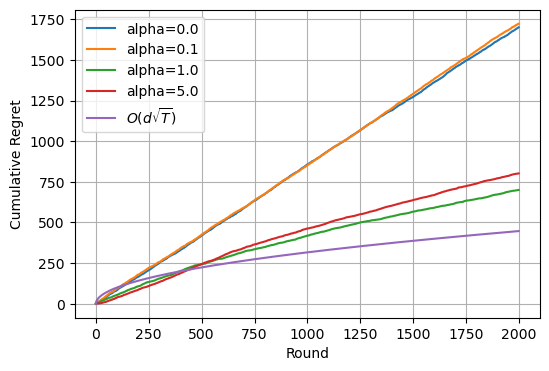

In [6]:
delta = 0.95
sequence = np.arange(T)

plt.figure(figsize=(6, 4))
for alpha, regrets in regret_result.items():
    plt.plot(np.cumsum(regrets), label=f"alpha={alpha}")
plt.plot(d*np.sqrt(sequence), label="$O(d\sqrt{T})$")
plt.grid(True)
plt.xlabel("Round")
plt.ylabel("Cumulative Regret")
plt.legend()
plt.show()

# LinUCB - 2

In [2]:
## For quick update of Ainv
def sherman_morrison(X, V, w=1):
    result = V - (w * np.einsum('ij,j,k,kl -> il', V, X, X, V)) / (1.+w*np.einsum('i,ij,j ->', X, V, X))
    return result

def l2norm(x:np.ndarray):
    return np.sqrt(np.sum(x ** 2))

In [3]:
class LinUCB:
    def __init__(self, d, alpha):
        ## Initialization
        self.t=0
        self.d=d
        self.alpha = alpha
        self.beta_hat=np.zeros(d)
        self.Ainv = np.eye(d)
        self.b = np.zeros(d)
        
        '''
        N : # of arms
        d : dimension of contexts
        t : steps taken
        
        '''
    def choose(self, contexts):
        # contexts: list [X(1),...X(N)]
        N = len(contexts)
        self.t = self.t + 1
        contexts = np.array(contexts) # N times d matrix
        print(f"Trial {self.t}\tGram inverse: {self.Ainv}")
        means = np.array(contexts) @ self.beta_hat
        norms = np.sqrt(np.einsum('Ni,ij,Nj -> N', contexts, self.Ainv, contexts))
        est = means + self.alpha * np.sqrt(np.log(self.t)) * norms
#         est = means + self.alpha * norms
        a_t = np.random.choice(np.where(est == est.max())[0])
        self.action = a_t
        self.Ainv = sherman_morrison(contexts[a_t], self.Ainv)
#         print(f"Trial {self.t}\ttheta: {self.beta_hat}")
        return(self.action)

    def update(self, context, reward):
        self.b += reward * context
        try:
            self.beta_hat = self.Ainv @ self.b
        except:
            print('Failed to update beta_hat')

In [4]:
d = 3      # dimension of context vectors
N = 5       # number of arms
M = 10000    # number of samples
T = 10000     # number of rounds
sigma = 1.0  # std of noise in reward
mute = True  # whether to print the results of each round or not

In [5]:
X = np.random.random((M,d))               # entire action space
beta = np.random.random(d)                # the true reward parameter
print(beta)
Y = X @ beta + sigma * np.random.randn(M) # realized reward data

[0.20118868 0.00931092 0.04671059]


In [6]:
indices = [np.random.randint(0, M, N) for _ in range(T)] # shuffled indices
print(len(indices))
indices[0]

10000


array([3106,  137, 4031, 6032, 3349])

In [7]:
alpha_list = [1.0]
regret_result = {}
for alpha in alpha_list:
    print(f"=====================alpha={alpha}=====================")
#     agent = LinUCB(N=N, d=d, alpha=alpha)
    agent = LinUCB(d=d, alpha=alpha)
    regrets = []
    if not mute:
        bar = tqdm(range(T))
    else:
        bar = range(T)
    for t in bar:
        ind = indices[t]
        action_set, reward_set = X[ind], Y[ind]
        mean_rewards = action_set @ beta

        optimal_action = np.argmax(mean_rewards)
        optimal_reward = mean_rewards[optimal_action]
        chosen_arm = agent.choose(action_set)

        reward = reward_set[chosen_arm]
        agent.update(action_set[chosen_arm], reward)

        instance_regret = optimal_reward - mean_rewards[chosen_arm]
        regrets.append(instance_regret)

#         if not mute:
#             print(f'round {t+1}, optimal action : {optimal_action}, optimal reward : {optimal_reward:.3f}, chosen action : {chosen_arm}, realized reward : {reward:.3f},\n\texpected reward: {mean_rewards[chosen_arm]:.3f} regret : {regrets[-1]:.3f}, cum.regret : {np.sum(regrets):.3f}')

        regret_result[alpha] = regrets

=====================alpha=1.0=====================
Trial 1	Gram inverse: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Trial 2	Gram inverse: [[ 0.99800299 -0.00358668 -0.02905187]
 [-0.00358668  0.99355821 -0.05217802]
 [-0.02905187 -0.05217802  0.57736172]]
Trial 3	Gram inverse: [[ 0.63248089 -0.13517041 -0.19228234]
 [-0.13517041  0.94618959 -0.1109391 ]
 [-0.19228234 -0.1109391   0.50446821]]
Trial 4	Gram inverse: [[ 0.62398518 -0.17853753 -0.20068702]
 [-0.17853753  0.72481824 -0.15384154]
 [-0.20068702 -0.15384154  0.49615359]]
Trial 5	Gram inverse: [[ 0.42522152 -0.14609966 -0.13979627]
 [-0.14609966  0.71952444 -0.1637788 ]
 [-0.13979627 -0.1637788   0.47749986]]
Trial 6	Gram inverse: [[ 0.41186682 -0.10301059 -0.1219866 ]
 [-0.10301059  0.58049701 -0.22124191]
 [-0.1219866  -0.22124191  0.45374908]]
Trial 7	Gram inverse: [[ 0.40133972 -0.113755   -0.08838744]
 [-0.113755    0.56953081 -0.18694919]
 [-0.08838744 -0.18694919  0.34651133]]
Trial 8	Gram inverse: [[ 0.39927514 -0.12936429 -

Trial 3350	Gram inverse: [[ 0.00199124 -0.00134062 -0.00125351]
 [-0.00134062  0.00233133 -0.00039922]
 [-0.00125351 -0.00039922  0.00293694]]
Trial 3351	Gram inverse: [[ 0.00199121 -0.00134041 -0.00125384]
 [-0.00134041  0.00232985 -0.00039696]
 [-0.00125384 -0.00039696  0.00293347]]
Trial 3352	Gram inverse: [[ 0.00199017 -0.00134014 -0.00125305]
 [-0.00134014  0.00232977 -0.00039716]
 [-0.00125305 -0.00039716  0.00293287]]
Trial 3353	Gram inverse: [[ 0.00198973 -0.00133985 -0.00125218]
 [-0.00133985  0.00232959 -0.00039773]
 [-0.00125218 -0.00039773  0.00293114]]
Trial 3354	Gram inverse: [[ 0.00198972 -0.00133992 -0.00125213]
 [-0.00133992  0.00232913 -0.00039743]
 [-0.00125213 -0.00039743  0.00293095]]
Trial 3355	Gram inverse: [[ 0.00198877 -0.00133895 -0.00125097]
 [-0.00133895  0.00232814 -0.00039862]
 [-0.00125097 -0.00039862  0.00292953]]
Trial 3356	Gram inverse: [[ 0.0019884  -0.00133808 -0.00125109]
 [-0.00133808  0.0023261  -0.00039835]
 [-0.00125109 -0.00039835  0.0029295 ]]

Trial 4586	Gram inverse: [[ 0.00147991 -0.0009872  -0.00087034]
 [-0.0009872   0.00172727 -0.00037791]
 [-0.00087034 -0.00037791  0.00210457]]
Trial 4587	Gram inverse: [[ 0.00147898 -0.00098685 -0.00086956]
 [-0.00098685  0.00172714 -0.00037821]
 [-0.00086956 -0.00037821  0.00210391]]
Trial 4588	Gram inverse: [[ 0.00147895 -0.00098685 -0.00086943]
 [-0.00098685  0.00172714 -0.00037824]
 [-0.00086943 -0.00037824  0.00210335]]
Trial 4589	Gram inverse: [[ 0.00147895 -0.00098685 -0.00086937]
 [-0.00098685  0.00172714 -0.0003782 ]
 [-0.00086937 -0.0003782   0.00210286]]
Trial 4590	Gram inverse: [[ 0.0014786  -0.00098654 -0.00086948]
 [-0.00098654  0.00172686 -0.0003781 ]
 [-0.00086948 -0.0003781   0.00210283]]
Trial 4591	Gram inverse: [[ 0.00147829 -0.00098625 -0.00086961]
 [-0.00098625  0.00172658 -0.00037798]
 [-0.00086961 -0.00037798  0.00210277]]
Trial 4592	Gram inverse: [[ 0.00147824 -0.00098637 -0.00086948]
 [-0.00098637  0.00172631 -0.00037768]
 [-0.00086948 -0.00037768  0.00210245]]

Trial 6118	Gram inverse: [[ 0.00114179 -0.00076164 -0.00065766]
 [-0.00076164  0.00131349 -0.00028546]
 [-0.00065766 -0.00028546  0.00156052]]
Trial 6119	Gram inverse: [[ 0.00114178 -0.00076163 -0.0006576 ]
 [-0.00076163  0.00131349 -0.00028549]
 [-0.0006576  -0.00028549  0.00156032]]
Trial 6120	Gram inverse: [[ 0.00114151 -0.00076123 -0.00065783]
 [-0.00076123  0.00131289 -0.00028515]
 [-0.00065783 -0.00028515  0.00156013]]
Trial 6121	Gram inverse: [[ 0.0011414  -0.00076113 -0.00065763]
 [-0.00076113  0.0013128  -0.00028534]
 [-0.00065763 -0.00028534  0.00155977]]
Trial 6122	Gram inverse: [[ 0.00114109 -0.00076085 -0.00065765]
 [-0.00076085  0.00131255 -0.00028532]
 [-0.00065765 -0.00028532  0.00155977]]
Trial 6123	Gram inverse: [[ 0.00114082 -0.00076083 -0.00065742]
 [-0.00076083  0.00131255 -0.00028534]
 [-0.00065742 -0.00028534  0.00155957]]
Trial 6124	Gram inverse: [[ 0.00114064 -0.00076069 -0.00065742]
 [-0.00076069  0.00131245 -0.00028534]
 [-0.00065742 -0.00028534  0.00155957]]

Trial 7930	Gram inverse: [[ 0.00089333 -0.00060419 -0.00052079]
 [-0.00060419  0.00103183 -0.00021482]
 [-0.00052079 -0.00021482  0.0012408 ]]
Trial 7931	Gram inverse: [[ 0.00089323 -0.00060415 -0.00052073]
 [-0.00060415  0.00103181 -0.00021484]
 [-0.00052073 -0.00021484  0.00124077]]
Trial 7932	Gram inverse: [[ 0.00089323 -0.00060416 -0.00052073]
 [-0.00060416  0.00103172 -0.00021478]
 [-0.00052073 -0.00021478  0.00124073]]
Trial 7933	Gram inverse: [[ 0.00089321 -0.00060413 -0.00052068]
 [-0.00060413  0.00103169 -0.00021484]
 [-0.00052068 -0.00021484  0.00124062]]
Trial 7934	Gram inverse: [[ 0.00089321 -0.00060413 -0.00052068]
 [-0.00060413  0.00103133 -0.00021453]
 [-0.00052068 -0.00021453  0.00124035]]
Trial 7935	Gram inverse: [[ 0.00089308 -0.00060402 -0.0005205 ]
 [-0.00060402  0.00103124 -0.00021469]
 [-0.0005205  -0.00021469  0.00124008]]
Trial 7936	Gram inverse: [[ 0.00089308 -0.00060403 -0.00052046]
 [-0.00060403  0.00103124 -0.00021467]
 [-0.00052046 -0.00021467  0.00123985]]

Trial 9376	Gram inverse: [[ 0.00076801 -0.00052214 -0.00045394]
 [-0.00052214  0.00088752 -0.00017431]
 [-0.00045394 -0.00017431  0.00106307]]
Trial 9377	Gram inverse: [[ 0.00076782 -0.00052203 -0.00045381]
 [-0.00052203  0.00088746 -0.00017438]
 [-0.00045381 -0.00017438  0.00106299]]
Trial 9378	Gram inverse: [[ 0.00076777 -0.00052204 -0.00045378]
 [-0.00052204  0.00088746 -0.00017438]
 [-0.00045378 -0.00017438  0.00106297]]
Trial 9379	Gram inverse: [[ 0.00076774 -0.00052196 -0.00045387]
 [-0.00052196  0.00088725 -0.00017414]
 [-0.00045387 -0.00017414  0.0010627 ]]
Trial 9380	Gram inverse: [[ 0.00076771 -0.00052189 -0.00045395]
 [-0.00052189  0.0008871  -0.00017397]
 [-0.00045395 -0.00017397  0.0010625 ]]
Trial 9381	Gram inverse: [[ 0.00076771 -0.0005219  -0.00045394]
 [-0.0005219   0.00088694 -0.00017382]
 [-0.00045394 -0.00017382  0.00106236]]
Trial 9382	Gram inverse: [[ 0.00076769 -0.00052189 -0.0004539 ]
 [-0.00052189  0.00088692 -0.00017385]
 [-0.0004539  -0.00017385  0.00106226]]

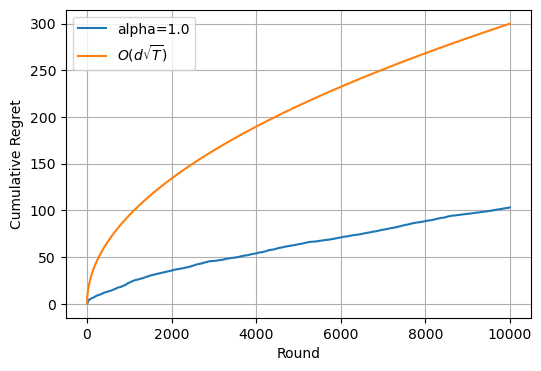

In [8]:
delta = 0.95
sequence = np.arange(T)

plt.figure(figsize=(6, 4))
for alpha, regrets in regret_result.items():
    plt.plot(np.cumsum(regrets), label=f"alpha={alpha}")
plt.plot(d * np.sqrt(sequence), label="$O(d\sqrt{T})$")
plt.grid(True)
plt.xlabel("Round")
plt.ylabel("Cumulative Regret")
plt.legend()
plt.show()

In [3]:
d = 3      # dimension of context vectors
N = 5       # number of arms
M = 10000    # number of samples
T = 10000     # number of rounds
sigma = 1.0  # std of noise in reward
mute = True  # whether to print the results of each round or not

In [4]:
X = np.random.random((M,d))               # entire action space
beta = np.random.random(d)                # the true reward parameter
print(beta)
Y = X @ beta + sigma * np.random.randn(M) # realized reward data

[0.20118868 0.00931092 0.04671059]


In [5]:
indices = [np.random.randint(0, M, N) for _ in range(T)] # shuffled indices
print(len(indices))
indices[0]

10000


array([3106,  137, 4031, 6032, 3349])

In [6]:
class LinUCB:
    def __init__(self, d, N, alpha, lbda):
        ## Initialization
        self.t=0
        self.d=d
        self.alpha = alpha
        self.lbda = lbda
        self.Vbar = self.lbda * np.identity(d)
        self.b = np.zeros(d)
        '''
        N : # of arms
        d : dimension of contexts
        t : steps taken
        
        '''
    def choose(self, contexts):
        self.t = self.t + 1
        Vinv = np.linalg.inv(self.Vbar)
        contexts = np.array(contexts) # N times d matrix
        theta = Vinv @ self.b
        means = np.array(contexts) @ theta
        norms = np.sqrt(np.einsum('Ni,ij,Nj -> N', contexts, Vinv, contexts))
        est = means + self.alpha * np.sqrt(np.log(self.t)) * norms
        a_t = np.random.choice(np.where(est == est.max())[0])
        return a_t, self.t, Vinv, norms

    def update(self, context, reward):
        self.b += reward * context
        self.Vbar += context.reshape(-1, 1) @ context.reshape(-1, 1).T

In [7]:
# alpha_list = [0.0, 0.1, 1.0, 5.0]
alpha_list = [1.0]
regret_result = {}
norm_norms1 = np.zeros(T)
with open(f"out_{datetime.now()}.txt", "w") as f:
    f.write("Direct computation\n")
    for alpha in alpha_list:
        print(f"=====================alpha={alpha}=====================")
        agent = LinUCB(N=N, d=d, alpha=alpha, lbda=1)
    #     agent = LinUCB(d=d, alpha=alpha)
        regrets = []
        if not mute:
            bar = tqdm(range(T))
        else:
            bar = range(T)
        for t in bar:
            ind = indices[t]
    #         print(ind)
            action_set, reward_set = X[ind], Y[ind]
            mean_rewards = action_set @ beta

            optimal_action = np.argmax(mean_rewards)
            optimal_reward = mean_rewards[optimal_action]
            chosen_arm, trial, Vinv, norms = agent.choose(action_set)
            print(f"Trial {trial}\t Chosen arm: {chosen_arm}")
            f.write(f"Trial {trial}\tVinv:\n{Vinv}\nNorms: {norms}\nChosen arm: {chosen_arm}\n")
            norm_norms1[t] = l2norm(norms)

            reward = reward_set[chosen_arm]
            agent.update(action_set[chosen_arm], reward)

            instance_regret = optimal_reward - mean_rewards[chosen_arm]
            regrets.append(instance_regret)

    #         if not mute:
    #             print(f'round {t+1}, optimal action : {optimal_action}, optimal reward : {optimal_reward:.3f}, chosen action : {chosen_arm}, realized reward : {reward:.3f},\n\texpected reward: {mean_rewards[chosen_arm]:.3f} regret : {regrets[-1]:.3f}, cum.regret : {np.sum(regrets):.3f}')

            regret_result[alpha] = regrets

=====================alpha=1.0=====================
Trial 1	 Chosen arm: 1
Trial 2	 Chosen arm: 0
Trial 3	 Chosen arm: 3
Trial 4	 Chosen arm: 1
Trial 5	 Chosen arm: 2
Trial 6	 Chosen arm: 1
Trial 7	 Chosen arm: 3
Trial 8	 Chosen arm: 2
Trial 9	 Chosen arm: 1
Trial 10	 Chosen arm: 1
Trial 11	 Chosen arm: 3
Trial 12	 Chosen arm: 3
Trial 13	 Chosen arm: 4
Trial 14	 Chosen arm: 2
Trial 15	 Chosen arm: 3
Trial 16	 Chosen arm: 1
Trial 17	 Chosen arm: 1
Trial 18	 Chosen arm: 0
Trial 19	 Chosen arm: 0
Trial 20	 Chosen arm: 2
Trial 21	 Chosen arm: 4
Trial 22	 Chosen arm: 0
Trial 23	 Chosen arm: 0
Trial 24	 Chosen arm: 2
Trial 25	 Chosen arm: 1
Trial 26	 Chosen arm: 3
Trial 27	 Chosen arm: 2
Trial 28	 Chosen arm: 1
Trial 29	 Chosen arm: 4
Trial 30	 Chosen arm: 4
Trial 31	 Chosen arm: 4
Trial 32	 Chosen arm: 0
Trial 33	 Chosen arm: 3
Trial 34	 Chosen arm: 0
Trial 35	 Chosen arm: 2
Trial 36	 Chosen arm: 1
Trial 37	 Chosen arm: 3
Trial 38	 Chosen arm: 4
Trial 39	 Chosen arm: 1
Trial 40	 Chosen arm:

Trial 828	 Chosen arm: 3
Trial 829	 Chosen arm: 2
Trial 830	 Chosen arm: 0
Trial 831	 Chosen arm: 1
Trial 832	 Chosen arm: 0
Trial 833	 Chosen arm: 3
Trial 834	 Chosen arm: 2
Trial 835	 Chosen arm: 3
Trial 836	 Chosen arm: 4
Trial 837	 Chosen arm: 4
Trial 838	 Chosen arm: 0
Trial 839	 Chosen arm: 3
Trial 840	 Chosen arm: 0
Trial 841	 Chosen arm: 2
Trial 842	 Chosen arm: 4
Trial 843	 Chosen arm: 0
Trial 844	 Chosen arm: 2
Trial 845	 Chosen arm: 2
Trial 846	 Chosen arm: 3
Trial 847	 Chosen arm: 2
Trial 848	 Chosen arm: 1
Trial 849	 Chosen arm: 3
Trial 850	 Chosen arm: 3
Trial 851	 Chosen arm: 2
Trial 852	 Chosen arm: 1
Trial 853	 Chosen arm: 3
Trial 854	 Chosen arm: 0
Trial 855	 Chosen arm: 4
Trial 856	 Chosen arm: 3
Trial 857	 Chosen arm: 2
Trial 858	 Chosen arm: 3
Trial 859	 Chosen arm: 3
Trial 860	 Chosen arm: 4
Trial 861	 Chosen arm: 3
Trial 862	 Chosen arm: 3
Trial 863	 Chosen arm: 4
Trial 864	 Chosen arm: 1
Trial 865	 Chosen arm: 3
Trial 866	 Chosen arm: 0
Trial 867	 Chosen arm: 0


Trial 3506	 Chosen arm: 3
Trial 3507	 Chosen arm: 3
Trial 3508	 Chosen arm: 4
Trial 3509	 Chosen arm: 4
Trial 3510	 Chosen arm: 1
Trial 3511	 Chosen arm: 2
Trial 3512	 Chosen arm: 0
Trial 3513	 Chosen arm: 0
Trial 3514	 Chosen arm: 1
Trial 3515	 Chosen arm: 2
Trial 3516	 Chosen arm: 4
Trial 3517	 Chosen arm: 1
Trial 3518	 Chosen arm: 0
Trial 3519	 Chosen arm: 1
Trial 3520	 Chosen arm: 2
Trial 3521	 Chosen arm: 3
Trial 3522	 Chosen arm: 2
Trial 3523	 Chosen arm: 2
Trial 3524	 Chosen arm: 3
Trial 3525	 Chosen arm: 4
Trial 3526	 Chosen arm: 3
Trial 3527	 Chosen arm: 2
Trial 3528	 Chosen arm: 1
Trial 3529	 Chosen arm: 1
Trial 3530	 Chosen arm: 0
Trial 3531	 Chosen arm: 2
Trial 3532	 Chosen arm: 2
Trial 3533	 Chosen arm: 0
Trial 3534	 Chosen arm: 1
Trial 3535	 Chosen arm: 0
Trial 3536	 Chosen arm: 3
Trial 3537	 Chosen arm: 1
Trial 3538	 Chosen arm: 0
Trial 3539	 Chosen arm: 0
Trial 3540	 Chosen arm: 1
Trial 3541	 Chosen arm: 3
Trial 3542	 Chosen arm: 0
Trial 3543	 Chosen arm: 0
Trial 3544	 

Trial 4171	 Chosen arm: 2
Trial 4172	 Chosen arm: 1
Trial 4173	 Chosen arm: 0
Trial 4174	 Chosen arm: 1
Trial 4175	 Chosen arm: 1
Trial 4176	 Chosen arm: 1
Trial 4177	 Chosen arm: 2
Trial 4178	 Chosen arm: 2
Trial 4179	 Chosen arm: 0
Trial 4180	 Chosen arm: 2
Trial 4181	 Chosen arm: 0
Trial 4182	 Chosen arm: 3
Trial 4183	 Chosen arm: 3
Trial 4184	 Chosen arm: 0
Trial 4185	 Chosen arm: 2
Trial 4186	 Chosen arm: 0
Trial 4187	 Chosen arm: 4
Trial 4188	 Chosen arm: 4
Trial 4189	 Chosen arm: 2
Trial 4190	 Chosen arm: 0
Trial 4191	 Chosen arm: 3
Trial 4192	 Chosen arm: 0
Trial 4193	 Chosen arm: 1
Trial 4194	 Chosen arm: 1
Trial 4195	 Chosen arm: 3
Trial 4196	 Chosen arm: 0
Trial 4197	 Chosen arm: 0
Trial 4198	 Chosen arm: 0
Trial 4199	 Chosen arm: 4
Trial 4200	 Chosen arm: 3
Trial 4201	 Chosen arm: 1
Trial 4202	 Chosen arm: 3
Trial 4203	 Chosen arm: 4
Trial 4204	 Chosen arm: 0
Trial 4205	 Chosen arm: 0
Trial 4206	 Chosen arm: 3
Trial 4207	 Chosen arm: 1
Trial 4208	 Chosen arm: 4
Trial 4209	 

Trial 5017	 Chosen arm: 3
Trial 5018	 Chosen arm: 2
Trial 5019	 Chosen arm: 3
Trial 5020	 Chosen arm: 1
Trial 5021	 Chosen arm: 0
Trial 5022	 Chosen arm: 4
Trial 5023	 Chosen arm: 0
Trial 5024	 Chosen arm: 0
Trial 5025	 Chosen arm: 4
Trial 5026	 Chosen arm: 0
Trial 5027	 Chosen arm: 0
Trial 5028	 Chosen arm: 1
Trial 5029	 Chosen arm: 1
Trial 5030	 Chosen arm: 4
Trial 5031	 Chosen arm: 1
Trial 5032	 Chosen arm: 2
Trial 5033	 Chosen arm: 2
Trial 5034	 Chosen arm: 3
Trial 5035	 Chosen arm: 3
Trial 5036	 Chosen arm: 2
Trial 5037	 Chosen arm: 2
Trial 5038	 Chosen arm: 2
Trial 5039	 Chosen arm: 3
Trial 5040	 Chosen arm: 0
Trial 5041	 Chosen arm: 4
Trial 5042	 Chosen arm: 2
Trial 5043	 Chosen arm: 0
Trial 5044	 Chosen arm: 4
Trial 5045	 Chosen arm: 1
Trial 5046	 Chosen arm: 3
Trial 5047	 Chosen arm: 3
Trial 5048	 Chosen arm: 4
Trial 5049	 Chosen arm: 2
Trial 5050	 Chosen arm: 0
Trial 5051	 Chosen arm: 1
Trial 5052	 Chosen arm: 0
Trial 5053	 Chosen arm: 4
Trial 5054	 Chosen arm: 1
Trial 5055	 

Trial 6004	 Chosen arm: 3
Trial 6005	 Chosen arm: 1
Trial 6006	 Chosen arm: 1
Trial 6007	 Chosen arm: 2
Trial 6008	 Chosen arm: 2
Trial 6009	 Chosen arm: 0
Trial 6010	 Chosen arm: 3
Trial 6011	 Chosen arm: 1
Trial 6012	 Chosen arm: 0
Trial 6013	 Chosen arm: 1
Trial 6014	 Chosen arm: 3
Trial 6015	 Chosen arm: 3
Trial 6016	 Chosen arm: 2
Trial 6017	 Chosen arm: 4
Trial 6018	 Chosen arm: 0
Trial 6019	 Chosen arm: 1
Trial 6020	 Chosen arm: 1
Trial 6021	 Chosen arm: 1
Trial 6022	 Chosen arm: 4
Trial 6023	 Chosen arm: 4
Trial 6024	 Chosen arm: 0
Trial 6025	 Chosen arm: 4
Trial 6026	 Chosen arm: 4
Trial 6027	 Chosen arm: 3
Trial 6028	 Chosen arm: 1
Trial 6029	 Chosen arm: 3
Trial 6030	 Chosen arm: 3
Trial 6031	 Chosen arm: 0
Trial 6032	 Chosen arm: 3
Trial 6033	 Chosen arm: 2
Trial 6034	 Chosen arm: 3
Trial 6035	 Chosen arm: 0
Trial 6036	 Chosen arm: 3
Trial 6037	 Chosen arm: 1
Trial 6038	 Chosen arm: 1
Trial 6039	 Chosen arm: 3
Trial 6040	 Chosen arm: 1
Trial 6041	 Chosen arm: 2
Trial 6042	 

Trial 6994	 Chosen arm: 1
Trial 6995	 Chosen arm: 3
Trial 6996	 Chosen arm: 1
Trial 6997	 Chosen arm: 4
Trial 6998	 Chosen arm: 1
Trial 6999	 Chosen arm: 3
Trial 7000	 Chosen arm: 3
Trial 7001	 Chosen arm: 1
Trial 7002	 Chosen arm: 0
Trial 7003	 Chosen arm: 2
Trial 7004	 Chosen arm: 1
Trial 7005	 Chosen arm: 3
Trial 7006	 Chosen arm: 3
Trial 7007	 Chosen arm: 4
Trial 7008	 Chosen arm: 1
Trial 7009	 Chosen arm: 3
Trial 7010	 Chosen arm: 1
Trial 7011	 Chosen arm: 0
Trial 7012	 Chosen arm: 3
Trial 7013	 Chosen arm: 2
Trial 7014	 Chosen arm: 2
Trial 7015	 Chosen arm: 2
Trial 7016	 Chosen arm: 0
Trial 7017	 Chosen arm: 3
Trial 7018	 Chosen arm: 3
Trial 7019	 Chosen arm: 4
Trial 7020	 Chosen arm: 0
Trial 7021	 Chosen arm: 3
Trial 7022	 Chosen arm: 0
Trial 7023	 Chosen arm: 3
Trial 7024	 Chosen arm: 0
Trial 7025	 Chosen arm: 1
Trial 7026	 Chosen arm: 1
Trial 7027	 Chosen arm: 0
Trial 7028	 Chosen arm: 0
Trial 7029	 Chosen arm: 1
Trial 7030	 Chosen arm: 3
Trial 7031	 Chosen arm: 0
Trial 7032	 

Trial 7870	 Chosen arm: 1
Trial 7871	 Chosen arm: 1
Trial 7872	 Chosen arm: 3
Trial 7873	 Chosen arm: 0
Trial 7874	 Chosen arm: 0
Trial 7875	 Chosen arm: 3
Trial 7876	 Chosen arm: 4
Trial 7877	 Chosen arm: 4
Trial 7878	 Chosen arm: 0
Trial 7879	 Chosen arm: 4
Trial 7880	 Chosen arm: 0
Trial 7881	 Chosen arm: 0
Trial 7882	 Chosen arm: 1
Trial 7883	 Chosen arm: 4
Trial 7884	 Chosen arm: 3
Trial 7885	 Chosen arm: 2
Trial 7886	 Chosen arm: 0
Trial 7887	 Chosen arm: 3
Trial 7888	 Chosen arm: 3
Trial 7889	 Chosen arm: 4
Trial 7890	 Chosen arm: 3
Trial 7891	 Chosen arm: 2
Trial 7892	 Chosen arm: 4
Trial 7893	 Chosen arm: 2
Trial 7894	 Chosen arm: 2
Trial 7895	 Chosen arm: 3
Trial 7896	 Chosen arm: 0
Trial 7897	 Chosen arm: 3
Trial 7898	 Chosen arm: 2
Trial 7899	 Chosen arm: 4
Trial 7900	 Chosen arm: 4
Trial 7901	 Chosen arm: 4
Trial 7902	 Chosen arm: 3
Trial 7903	 Chosen arm: 4
Trial 7904	 Chosen arm: 4
Trial 7905	 Chosen arm: 1
Trial 7906	 Chosen arm: 3
Trial 7907	 Chosen arm: 2
Trial 7908	 

Trial 8864	 Chosen arm: 3
Trial 8865	 Chosen arm: 2
Trial 8866	 Chosen arm: 2
Trial 8867	 Chosen arm: 0
Trial 8868	 Chosen arm: 3
Trial 8869	 Chosen arm: 2
Trial 8870	 Chosen arm: 2
Trial 8871	 Chosen arm: 3
Trial 8872	 Chosen arm: 0
Trial 8873	 Chosen arm: 3
Trial 8874	 Chosen arm: 3
Trial 8875	 Chosen arm: 1
Trial 8876	 Chosen arm: 2
Trial 8877	 Chosen arm: 1
Trial 8878	 Chosen arm: 2
Trial 8879	 Chosen arm: 4
Trial 8880	 Chosen arm: 3
Trial 8881	 Chosen arm: 2
Trial 8882	 Chosen arm: 3
Trial 8883	 Chosen arm: 4
Trial 8884	 Chosen arm: 3
Trial 8885	 Chosen arm: 0
Trial 8886	 Chosen arm: 2
Trial 8887	 Chosen arm: 1
Trial 8888	 Chosen arm: 2
Trial 8889	 Chosen arm: 0
Trial 8890	 Chosen arm: 2
Trial 8891	 Chosen arm: 0
Trial 8892	 Chosen arm: 2
Trial 8893	 Chosen arm: 4
Trial 8894	 Chosen arm: 4
Trial 8895	 Chosen arm: 4
Trial 8896	 Chosen arm: 4
Trial 8897	 Chosen arm: 0
Trial 8898	 Chosen arm: 0
Trial 8899	 Chosen arm: 1
Trial 8900	 Chosen arm: 1
Trial 8901	 Chosen arm: 1
Trial 8902	 

Trial 9828	 Chosen arm: 1
Trial 9829	 Chosen arm: 4
Trial 9830	 Chosen arm: 3
Trial 9831	 Chosen arm: 2
Trial 9832	 Chosen arm: 0
Trial 9833	 Chosen arm: 1
Trial 9834	 Chosen arm: 3
Trial 9835	 Chosen arm: 2
Trial 9836	 Chosen arm: 1
Trial 9837	 Chosen arm: 1
Trial 9838	 Chosen arm: 0
Trial 9839	 Chosen arm: 1
Trial 9840	 Chosen arm: 4
Trial 9841	 Chosen arm: 4
Trial 9842	 Chosen arm: 1
Trial 9843	 Chosen arm: 1
Trial 9844	 Chosen arm: 4
Trial 9845	 Chosen arm: 2
Trial 9846	 Chosen arm: 2
Trial 9847	 Chosen arm: 0
Trial 9848	 Chosen arm: 4
Trial 9849	 Chosen arm: 2
Trial 9850	 Chosen arm: 4
Trial 9851	 Chosen arm: 0
Trial 9852	 Chosen arm: 1
Trial 9853	 Chosen arm: 3
Trial 9854	 Chosen arm: 4
Trial 9855	 Chosen arm: 3
Trial 9856	 Chosen arm: 0
Trial 9857	 Chosen arm: 4
Trial 9858	 Chosen arm: 0
Trial 9859	 Chosen arm: 3
Trial 9860	 Chosen arm: 2
Trial 9861	 Chosen arm: 0
Trial 9862	 Chosen arm: 4
Trial 9863	 Chosen arm: 4
Trial 9864	 Chosen arm: 3
Trial 9865	 Chosen arm: 4
Trial 9866	 

In [8]:
class LinUCB:
    def __init__(self, d, alpha):
        ## Initialization
        self.t=0
        self.d=d
        self.alpha = alpha
        self.beta_hat=np.zeros(d)
        self.Ainv = np.eye(d)
        self.b = np.zeros(d)
        
        '''
        N : # of arms
        d : dimension of contexts
        t : steps taken
        
        '''
    def choose(self, contexts):
        # contexts: list [X(1),...X(N)]
        N = len(contexts)
        self.t = self.t + 1
        contexts = np.array(contexts) # N times d matrix
        means = np.array(contexts) @ self.beta_hat
        norms = np.sqrt(np.einsum('Ni,ij,Nj -> N', contexts, self.Ainv, contexts))
        est = means + self.alpha * np.sqrt(np.log(self.t)) * norms
        a_t = np.random.choice(np.where(est == est.max())[0])
        self.action = a_t
        self.Ainv = sherman_morrison(contexts[a_t], self.Ainv)
        return self.action, self.t, self.Ainv, norms

    def update(self, context, reward):
        self.b += reward * context
        try:
            self.beta_hat = self.Ainv @ self.b
        except:
            print('Failed to update beta_hat')

In [9]:
# alpha_list = [0.0, 0.1, 1.0, 5.0]
alpha_list = [1.0]
regret_result = {}
norm_norms2 = np.zeros(T)
with open(f"out_{datetime.now()}.txt", "w") as f:
    f.write("Sherman Morrison\n")
    for alpha in alpha_list:
        print(f"=====================alpha={alpha}=====================")
#         agent = LinUCB(N=N, d=d, alpha=alpha, lbda=1)
        agent = LinUCB(d=d, alpha=alpha)
        regrets = []
        if not mute:
            bar = tqdm(range(T))
        else:
            bar = range(T)
        for t in bar:
            ind = indices[t]
    #         print(ind)
            action_set, reward_set = X[ind], Y[ind]
            mean_rewards = action_set @ beta

            optimal_action = np.argmax(mean_rewards)
            optimal_reward = mean_rewards[optimal_action]
            chosen_arm, trial, Vinv, norms = agent.choose(action_set)
            print(f"Trial {trial}\t Chosen arm: {chosen_arm}")
            f.write(f"Trial {trial}\tVinv:\n{Vinv}\nNorms: {norms}\nChosen arm: {chosen_arm}\n")
            norm_norms2[t] = l2norm(norms)

            reward = reward_set[chosen_arm]
            agent.update(action_set[chosen_arm], reward)

            instance_regret = optimal_reward - mean_rewards[chosen_arm]
            regrets.append(instance_regret)

    #         if not mute:
    #             print(f'round {t+1}, optimal action : {optimal_action}, optimal reward : {optimal_reward:.3f}, chosen action : {chosen_arm}, realized reward : {reward:.3f},\n\texpected reward: {mean_rewards[chosen_arm]:.3f} regret : {regrets[-1]:.3f}, cum.regret : {np.sum(regrets):.3f}')

            regret_result[alpha] = regrets

=====================alpha=1.0=====================
Trial 1	 Chosen arm: 2
Trial 2	 Chosen arm: 0
Trial 3	 Chosen arm: 2
Trial 4	 Chosen arm: 0
Trial 5	 Chosen arm: 3
Trial 6	 Chosen arm: 2
Trial 7	 Chosen arm: 0
Trial 8	 Chosen arm: 2
Trial 9	 Chosen arm: 1
Trial 10	 Chosen arm: 3
Trial 11	 Chosen arm: 1
Trial 12	 Chosen arm: 1
Trial 13	 Chosen arm: 4
Trial 14	 Chosen arm: 2
Trial 15	 Chosen arm: 3
Trial 16	 Chosen arm: 3
Trial 17	 Chosen arm: 4
Trial 18	 Chosen arm: 4
Trial 19	 Chosen arm: 2
Trial 20	 Chosen arm: 2
Trial 21	 Chosen arm: 4
Trial 22	 Chosen arm: 2
Trial 23	 Chosen arm: 3
Trial 24	 Chosen arm: 2
Trial 25	 Chosen arm: 1
Trial 26	 Chosen arm: 2
Trial 27	 Chosen arm: 4
Trial 28	 Chosen arm: 1
Trial 29	 Chosen arm: 4
Trial 30	 Chosen arm: 3
Trial 31	 Chosen arm: 0
Trial 32	 Chosen arm: 1
Trial 33	 Chosen arm: 1
Trial 34	 Chosen arm: 4
Trial 35	 Chosen arm: 1
Trial 36	 Chosen arm: 1
Trial 37	 Chosen arm: 3
Trial 38	 Chosen arm: 0
Trial 39	 Chosen arm: 3
Trial 40	 Chosen arm:

Trial 909	 Chosen arm: 2
Trial 910	 Chosen arm: 2
Trial 911	 Chosen arm: 2
Trial 912	 Chosen arm: 4
Trial 913	 Chosen arm: 2
Trial 914	 Chosen arm: 3
Trial 915	 Chosen arm: 2
Trial 916	 Chosen arm: 3
Trial 917	 Chosen arm: 2
Trial 918	 Chosen arm: 4
Trial 919	 Chosen arm: 3
Trial 920	 Chosen arm: 2
Trial 921	 Chosen arm: 2
Trial 922	 Chosen arm: 4
Trial 923	 Chosen arm: 4
Trial 924	 Chosen arm: 4
Trial 925	 Chosen arm: 3
Trial 926	 Chosen arm: 2
Trial 927	 Chosen arm: 4
Trial 928	 Chosen arm: 4
Trial 929	 Chosen arm: 3
Trial 930	 Chosen arm: 4
Trial 931	 Chosen arm: 0
Trial 932	 Chosen arm: 0
Trial 933	 Chosen arm: 0
Trial 934	 Chosen arm: 1
Trial 935	 Chosen arm: 1
Trial 936	 Chosen arm: 3
Trial 937	 Chosen arm: 0
Trial 938	 Chosen arm: 0
Trial 939	 Chosen arm: 0
Trial 940	 Chosen arm: 3
Trial 941	 Chosen arm: 0
Trial 942	 Chosen arm: 1
Trial 943	 Chosen arm: 4
Trial 944	 Chosen arm: 4
Trial 945	 Chosen arm: 2
Trial 946	 Chosen arm: 1
Trial 947	 Chosen arm: 1
Trial 948	 Chosen arm: 0


Trial 1746	 Chosen arm: 1
Trial 1747	 Chosen arm: 4
Trial 1748	 Chosen arm: 0
Trial 1749	 Chosen arm: 1
Trial 1750	 Chosen arm: 1
Trial 1751	 Chosen arm: 2
Trial 1752	 Chosen arm: 2
Trial 1753	 Chosen arm: 1
Trial 1754	 Chosen arm: 3
Trial 1755	 Chosen arm: 4
Trial 1756	 Chosen arm: 3
Trial 1757	 Chosen arm: 0
Trial 1758	 Chosen arm: 2
Trial 1759	 Chosen arm: 2
Trial 1760	 Chosen arm: 3
Trial 1761	 Chosen arm: 2
Trial 1762	 Chosen arm: 1
Trial 1763	 Chosen arm: 3
Trial 1764	 Chosen arm: 1
Trial 1765	 Chosen arm: 0
Trial 1766	 Chosen arm: 1
Trial 1767	 Chosen arm: 3
Trial 1768	 Chosen arm: 3
Trial 1769	 Chosen arm: 3
Trial 1770	 Chosen arm: 4
Trial 1771	 Chosen arm: 0
Trial 1772	 Chosen arm: 1
Trial 1773	 Chosen arm: 4
Trial 1774	 Chosen arm: 4
Trial 1775	 Chosen arm: 1
Trial 1776	 Chosen arm: 0
Trial 1777	 Chosen arm: 0
Trial 1778	 Chosen arm: 0
Trial 1779	 Chosen arm: 3
Trial 1780	 Chosen arm: 2
Trial 1781	 Chosen arm: 2
Trial 1782	 Chosen arm: 1
Trial 1783	 Chosen arm: 2
Trial 1784	 

Trial 2587	 Chosen arm: 1
Trial 2588	 Chosen arm: 2
Trial 2589	 Chosen arm: 1
Trial 2590	 Chosen arm: 4
Trial 2591	 Chosen arm: 2
Trial 2592	 Chosen arm: 2
Trial 2593	 Chosen arm: 4
Trial 2594	 Chosen arm: 3
Trial 2595	 Chosen arm: 1
Trial 2596	 Chosen arm: 4
Trial 2597	 Chosen arm: 1
Trial 2598	 Chosen arm: 4
Trial 2599	 Chosen arm: 2
Trial 2600	 Chosen arm: 2
Trial 2601	 Chosen arm: 3
Trial 2602	 Chosen arm: 1
Trial 2603	 Chosen arm: 3
Trial 2604	 Chosen arm: 0
Trial 2605	 Chosen arm: 2
Trial 2606	 Chosen arm: 0
Trial 2607	 Chosen arm: 0
Trial 2608	 Chosen arm: 0
Trial 2609	 Chosen arm: 1
Trial 2610	 Chosen arm: 2
Trial 2611	 Chosen arm: 4
Trial 2612	 Chosen arm: 0
Trial 2613	 Chosen arm: 0
Trial 2614	 Chosen arm: 4
Trial 2615	 Chosen arm: 4
Trial 2616	 Chosen arm: 2
Trial 2617	 Chosen arm: 1
Trial 2618	 Chosen arm: 2
Trial 2619	 Chosen arm: 1
Trial 2620	 Chosen arm: 0
Trial 2621	 Chosen arm: 0
Trial 2622	 Chosen arm: 3
Trial 2623	 Chosen arm: 0
Trial 2624	 Chosen arm: 3
Trial 2625	 

Trial 3437	 Chosen arm: 3
Trial 3438	 Chosen arm: 2
Trial 3439	 Chosen arm: 3
Trial 3440	 Chosen arm: 1
Trial 3441	 Chosen arm: 4
Trial 3442	 Chosen arm: 1
Trial 3443	 Chosen arm: 0
Trial 3444	 Chosen arm: 2
Trial 3445	 Chosen arm: 4
Trial 3446	 Chosen arm: 0
Trial 3447	 Chosen arm: 1
Trial 3448	 Chosen arm: 1
Trial 3449	 Chosen arm: 3
Trial 3450	 Chosen arm: 4
Trial 3451	 Chosen arm: 3
Trial 3452	 Chosen arm: 2
Trial 3453	 Chosen arm: 4
Trial 3454	 Chosen arm: 4
Trial 3455	 Chosen arm: 2
Trial 3456	 Chosen arm: 2
Trial 3457	 Chosen arm: 3
Trial 3458	 Chosen arm: 1
Trial 3459	 Chosen arm: 4
Trial 3460	 Chosen arm: 1
Trial 3461	 Chosen arm: 4
Trial 3462	 Chosen arm: 4
Trial 3463	 Chosen arm: 1
Trial 3464	 Chosen arm: 0
Trial 3465	 Chosen arm: 4
Trial 3466	 Chosen arm: 4
Trial 3467	 Chosen arm: 0
Trial 3468	 Chosen arm: 1
Trial 3469	 Chosen arm: 3
Trial 3470	 Chosen arm: 2
Trial 3471	 Chosen arm: 4
Trial 3472	 Chosen arm: 0
Trial 3473	 Chosen arm: 0
Trial 3474	 Chosen arm: 0
Trial 3475	 

Trial 4285	 Chosen arm: 2
Trial 4286	 Chosen arm: 2
Trial 4287	 Chosen arm: 0
Trial 4288	 Chosen arm: 1
Trial 4289	 Chosen arm: 3
Trial 4290	 Chosen arm: 0
Trial 4291	 Chosen arm: 4
Trial 4292	 Chosen arm: 3
Trial 4293	 Chosen arm: 2
Trial 4294	 Chosen arm: 1
Trial 4295	 Chosen arm: 2
Trial 4296	 Chosen arm: 0
Trial 4297	 Chosen arm: 3
Trial 4298	 Chosen arm: 2
Trial 4299	 Chosen arm: 3
Trial 4300	 Chosen arm: 1
Trial 4301	 Chosen arm: 1
Trial 4302	 Chosen arm: 2
Trial 4303	 Chosen arm: 2
Trial 4304	 Chosen arm: 4
Trial 4305	 Chosen arm: 3
Trial 4306	 Chosen arm: 3
Trial 4307	 Chosen arm: 1
Trial 4308	 Chosen arm: 2
Trial 4309	 Chosen arm: 0
Trial 4310	 Chosen arm: 2
Trial 4311	 Chosen arm: 3
Trial 4312	 Chosen arm: 0
Trial 4313	 Chosen arm: 4
Trial 4314	 Chosen arm: 0
Trial 4315	 Chosen arm: 2
Trial 4316	 Chosen arm: 2
Trial 4317	 Chosen arm: 1
Trial 4318	 Chosen arm: 0
Trial 4319	 Chosen arm: 4
Trial 4320	 Chosen arm: 1
Trial 4321	 Chosen arm: 1
Trial 4322	 Chosen arm: 1
Trial 4323	 

Trial 5102	 Chosen arm: 3
Trial 5103	 Chosen arm: 2
Trial 5104	 Chosen arm: 2
Trial 5105	 Chosen arm: 0
Trial 5106	 Chosen arm: 1
Trial 5107	 Chosen arm: 1
Trial 5108	 Chosen arm: 4
Trial 5109	 Chosen arm: 4
Trial 5110	 Chosen arm: 2
Trial 5111	 Chosen arm: 3
Trial 5112	 Chosen arm: 3
Trial 5113	 Chosen arm: 0
Trial 5114	 Chosen arm: 3
Trial 5115	 Chosen arm: 0
Trial 5116	 Chosen arm: 4
Trial 5117	 Chosen arm: 4
Trial 5118	 Chosen arm: 0
Trial 5119	 Chosen arm: 2
Trial 5120	 Chosen arm: 0
Trial 5121	 Chosen arm: 0
Trial 5122	 Chosen arm: 4
Trial 5123	 Chosen arm: 3
Trial 5124	 Chosen arm: 4
Trial 5125	 Chosen arm: 3
Trial 5126	 Chosen arm: 3
Trial 5127	 Chosen arm: 1
Trial 5128	 Chosen arm: 0
Trial 5129	 Chosen arm: 4
Trial 5130	 Chosen arm: 3
Trial 5131	 Chosen arm: 2
Trial 5132	 Chosen arm: 0
Trial 5133	 Chosen arm: 2
Trial 5134	 Chosen arm: 2
Trial 5135	 Chosen arm: 3
Trial 5136	 Chosen arm: 3
Trial 5137	 Chosen arm: 1
Trial 5138	 Chosen arm: 3
Trial 5139	 Chosen arm: 4
Trial 5140	 

Trial 5953	 Chosen arm: 0
Trial 5954	 Chosen arm: 3
Trial 5955	 Chosen arm: 4
Trial 5956	 Chosen arm: 2
Trial 5957	 Chosen arm: 3
Trial 5958	 Chosen arm: 3
Trial 5959	 Chosen arm: 3
Trial 5960	 Chosen arm: 4
Trial 5961	 Chosen arm: 2
Trial 5962	 Chosen arm: 3
Trial 5963	 Chosen arm: 0
Trial 5964	 Chosen arm: 1
Trial 5965	 Chosen arm: 1
Trial 5966	 Chosen arm: 2
Trial 5967	 Chosen arm: 4
Trial 5968	 Chosen arm: 4
Trial 5969	 Chosen arm: 4
Trial 5970	 Chosen arm: 1
Trial 5971	 Chosen arm: 4
Trial 5972	 Chosen arm: 0
Trial 5973	 Chosen arm: 3
Trial 5974	 Chosen arm: 0
Trial 5975	 Chosen arm: 3
Trial 5976	 Chosen arm: 2
Trial 5977	 Chosen arm: 1
Trial 5978	 Chosen arm: 3
Trial 5979	 Chosen arm: 4
Trial 5980	 Chosen arm: 3
Trial 5981	 Chosen arm: 1
Trial 5982	 Chosen arm: 3
Trial 5983	 Chosen arm: 4
Trial 5984	 Chosen arm: 0
Trial 5985	 Chosen arm: 3
Trial 5986	 Chosen arm: 2
Trial 5987	 Chosen arm: 3
Trial 5988	 Chosen arm: 1
Trial 5989	 Chosen arm: 1
Trial 5990	 Chosen arm: 1
Trial 5991	 

Trial 6816	 Chosen arm: 0
Trial 6817	 Chosen arm: 2
Trial 6818	 Chosen arm: 0
Trial 6819	 Chosen arm: 0
Trial 6820	 Chosen arm: 3
Trial 6821	 Chosen arm: 0
Trial 6822	 Chosen arm: 0
Trial 6823	 Chosen arm: 0
Trial 6824	 Chosen arm: 0
Trial 6825	 Chosen arm: 3
Trial 6826	 Chosen arm: 2
Trial 6827	 Chosen arm: 1
Trial 6828	 Chosen arm: 2
Trial 6829	 Chosen arm: 2
Trial 6830	 Chosen arm: 0
Trial 6831	 Chosen arm: 2
Trial 6832	 Chosen arm: 4
Trial 6833	 Chosen arm: 3
Trial 6834	 Chosen arm: 3
Trial 6835	 Chosen arm: 0
Trial 6836	 Chosen arm: 4
Trial 6837	 Chosen arm: 4
Trial 6838	 Chosen arm: 3
Trial 6839	 Chosen arm: 2
Trial 6840	 Chosen arm: 1
Trial 6841	 Chosen arm: 4
Trial 6842	 Chosen arm: 2
Trial 6843	 Chosen arm: 2
Trial 6844	 Chosen arm: 0
Trial 6845	 Chosen arm: 4
Trial 6846	 Chosen arm: 4
Trial 6847	 Chosen arm: 2
Trial 6848	 Chosen arm: 4
Trial 6849	 Chosen arm: 1
Trial 6850	 Chosen arm: 2
Trial 6851	 Chosen arm: 1
Trial 6852	 Chosen arm: 1
Trial 6853	 Chosen arm: 3
Trial 6854	 

Trial 7665	 Chosen arm: 1
Trial 7666	 Chosen arm: 2
Trial 7667	 Chosen arm: 3
Trial 7668	 Chosen arm: 0
Trial 7669	 Chosen arm: 1
Trial 7670	 Chosen arm: 2
Trial 7671	 Chosen arm: 4
Trial 7672	 Chosen arm: 4
Trial 7673	 Chosen arm: 1
Trial 7674	 Chosen arm: 4
Trial 7675	 Chosen arm: 0
Trial 7676	 Chosen arm: 1
Trial 7677	 Chosen arm: 4
Trial 7678	 Chosen arm: 4
Trial 7679	 Chosen arm: 4
Trial 7680	 Chosen arm: 1
Trial 7681	 Chosen arm: 1
Trial 7682	 Chosen arm: 3
Trial 7683	 Chosen arm: 4
Trial 7684	 Chosen arm: 2
Trial 7685	 Chosen arm: 2
Trial 7686	 Chosen arm: 2
Trial 7687	 Chosen arm: 4
Trial 7688	 Chosen arm: 4
Trial 7689	 Chosen arm: 0
Trial 7690	 Chosen arm: 3
Trial 7691	 Chosen arm: 0
Trial 7692	 Chosen arm: 1
Trial 7693	 Chosen arm: 1
Trial 7694	 Chosen arm: 2
Trial 7695	 Chosen arm: 4
Trial 7696	 Chosen arm: 4
Trial 7697	 Chosen arm: 1
Trial 7698	 Chosen arm: 4
Trial 7699	 Chosen arm: 1
Trial 7700	 Chosen arm: 4
Trial 7701	 Chosen arm: 2
Trial 7702	 Chosen arm: 4
Trial 7703	 

Trial 8526	 Chosen arm: 2
Trial 8527	 Chosen arm: 0
Trial 8528	 Chosen arm: 3
Trial 8529	 Chosen arm: 0
Trial 8530	 Chosen arm: 0
Trial 8531	 Chosen arm: 3
Trial 8532	 Chosen arm: 2
Trial 8533	 Chosen arm: 4
Trial 8534	 Chosen arm: 4
Trial 8535	 Chosen arm: 1
Trial 8536	 Chosen arm: 2
Trial 8537	 Chosen arm: 1
Trial 8538	 Chosen arm: 3
Trial 8539	 Chosen arm: 2
Trial 8540	 Chosen arm: 1
Trial 8541	 Chosen arm: 4
Trial 8542	 Chosen arm: 4
Trial 8543	 Chosen arm: 2
Trial 8544	 Chosen arm: 0
Trial 8545	 Chosen arm: 1
Trial 8546	 Chosen arm: 4
Trial 8547	 Chosen arm: 3
Trial 8548	 Chosen arm: 3
Trial 8549	 Chosen arm: 0
Trial 8550	 Chosen arm: 2
Trial 8551	 Chosen arm: 3
Trial 8552	 Chosen arm: 2
Trial 8553	 Chosen arm: 4
Trial 8554	 Chosen arm: 0
Trial 8555	 Chosen arm: 2
Trial 8556	 Chosen arm: 1
Trial 8557	 Chosen arm: 2
Trial 8558	 Chosen arm: 0
Trial 8559	 Chosen arm: 2
Trial 8560	 Chosen arm: 3
Trial 8561	 Chosen arm: 0
Trial 8562	 Chosen arm: 2
Trial 8563	 Chosen arm: 2
Trial 8564	 

Trial 9367	 Chosen arm: 0
Trial 9368	 Chosen arm: 1
Trial 9369	 Chosen arm: 0
Trial 9370	 Chosen arm: 4
Trial 9371	 Chosen arm: 4
Trial 9372	 Chosen arm: 2
Trial 9373	 Chosen arm: 0
Trial 9374	 Chosen arm: 2
Trial 9375	 Chosen arm: 4
Trial 9376	 Chosen arm: 3
Trial 9377	 Chosen arm: 4
Trial 9378	 Chosen arm: 3
Trial 9379	 Chosen arm: 4
Trial 9380	 Chosen arm: 3
Trial 9381	 Chosen arm: 4
Trial 9382	 Chosen arm: 2
Trial 9383	 Chosen arm: 3
Trial 9384	 Chosen arm: 3
Trial 9385	 Chosen arm: 3
Trial 9386	 Chosen arm: 4
Trial 9387	 Chosen arm: 3
Trial 9388	 Chosen arm: 0
Trial 9389	 Chosen arm: 2
Trial 9390	 Chosen arm: 4
Trial 9391	 Chosen arm: 3
Trial 9392	 Chosen arm: 0
Trial 9393	 Chosen arm: 1
Trial 9394	 Chosen arm: 0
Trial 9395	 Chosen arm: 4
Trial 9396	 Chosen arm: 2
Trial 9397	 Chosen arm: 1
Trial 9398	 Chosen arm: 4
Trial 9399	 Chosen arm: 4
Trial 9400	 Chosen arm: 2
Trial 9401	 Chosen arm: 2
Trial 9402	 Chosen arm: 4
Trial 9403	 Chosen arm: 0
Trial 9404	 Chosen arm: 3
Trial 9405	 

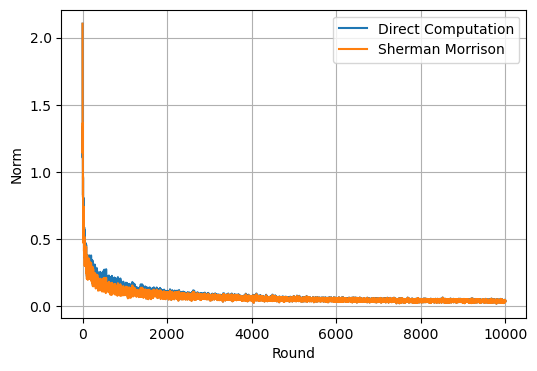

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(norm_norms1, label="Direct Computation")
plt.plot(norm_norms2, label="Sherman Morrison")
plt.grid(True)
plt.xlabel("Round")
plt.ylabel("Norm")
plt.legend()
plt.show()

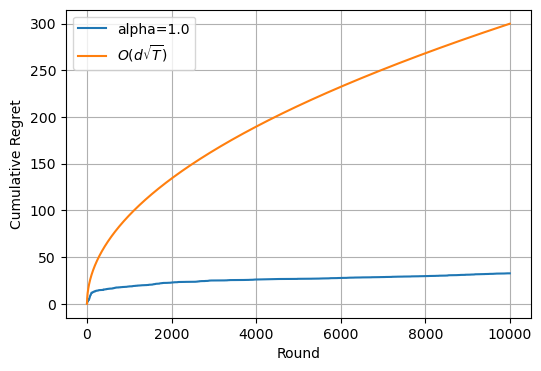

In [17]:
delta = 0.95
sequence = np.arange(T)

plt.figure(figsize=(6, 4))
for alpha, regrets in regret_result.items():
    plt.plot(np.cumsum(regrets), label=f"alpha={alpha}")
plt.plot(d * np.sqrt(sequence), label="$O(d\sqrt{T})$")
plt.grid(True)
plt.xlabel("Round")
plt.ylabel("Cumulative Regret")
plt.legend()
plt.show()